In [1]:
import numpy as np
import scipy.stats as stat
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import pandas as pd
from fanalysis.pca import PCA
%matplotlib inline

In [2]:
df = pd.read_table("fanalysis/tests/pca_data.txt", header=0, index_col=0, delimiter="\t", encoding="utf-8")
print(df)

                  CYL  PUISS  LONG  LARG  POIDS  V-MAX FINITION   PRIX
Modele                                                                
Alfasud-TI       1350     79   393   161    870    165        B  30570
Audi-100         1588     85   468   177   1110    160       TB  39990
Simca-1300       1294     68   424   168   1050    152        M  29600
Citroen-GS-Club  1222     59   412   161    930    151        M  28250
Fiat-132         1585     98   439   164   1105    165        B  34900
Lancia-Beta      1297     82   429   169   1080    160       TB  35480
Peugeot-504      1796     79   449   169   1160    154        B  32300
Renault-16-TL    1565     55   424   163   1010    140        B  32000
Renault-30       2664    128   452   173   1320    180       TB  47700
Toyota-Corolla   1166     55   399   157    815    140        M  26540
Alfetta-1.66     1570    109   428   162   1060    175       TB  42395
Princess-1800    1798     82   445   172   1160    158        B  33990
Datsun

In [7]:
X = df.iloc[:,0:6].values
print(X)
Y = df.iloc[:,7:8].values
print(Y)

[[1350   79  393  161  870  165]
 [1588   85  468  177 1110  160]
 [1294   68  424  168 1050  152]
 [1222   59  412  161  930  151]
 [1585   98  439  164 1105  165]
 [1297   82  429  169 1080  160]
 [1796   79  449  169 1160  154]
 [1565   55  424  163 1010  140]
 [2664  128  452  173 1320  180]
 [1166   55  399  157  815  140]
 [1570  109  428  162 1060  175]
 [1798   82  445  172 1160  158]
 [1998  115  469  169 1370  160]
 [1993   98  438  170 1080  167]
 [1442   80  431  166 1129  144]
 [1769   83  440  165 1095  165]
 [1979  100  459  173 1120  173]
 [1294   68  404  161  955  140]]
[[30570]
 [39990]
 [29600]
 [28250]
 [34900]
 [35480]
 [32300]
 [32000]
 [47700]
 [26540]
 [42395]
 [33990]
 [43980]
 [35010]
 [39450]
 [27900]
 [32700]
 [22100]]


In [5]:
import numpy as np
means_ = np.mean(X, axis=0).reshape(1, -1)
std_ = np.std(X, axis=0, ddof=0).reshape(1, -1)
Z = (X - means_) / std_
U, lambdas, V = np.linalg.svd(Z, full_matrices=False)
print(U)

[[-0.23977601 -0.45489896 -0.22067967 -0.10290372  0.23316757 -0.06108363]
 [ 0.17504146  0.38901071 -0.50755864  0.10770636 -0.11491073  0.3707088 ]
 [-0.12548449  0.17182895 -0.17619576  0.08542341  0.29042869 -0.30790958]
 [-0.28851967 -0.02875703 -0.05733257  0.00883824 -0.17552212 -0.29847642]
 [ 0.0479631  -0.1771945   0.07458827  0.31990848 -0.20388078  0.04208801]
 [-0.03410542  0.04996854 -0.26079009  0.28331197  0.34437435 -0.22666202]
 [ 0.07666924  0.2376945   0.09910714 -0.10351879 -0.16143911 -0.17433474]
 [-0.21842846  0.24976734  0.23909179 -0.32121546 -0.22682934 -0.12307377]
 [ 0.49433677 -0.2709586   0.22904055 -0.43176395  0.29006171 -0.04984108]
 [-0.4468112  -0.06018181  0.11697811 -0.13510809 -0.2154272   0.37258201]
 [ 0.04906203 -0.48719266 -0.00962512  0.38674655 -0.13006532  0.06144609]
 [ 0.11413873  0.21442461 -0.08358913 -0.15462842  0.14304311 -0.20945483]
 [ 0.32969878  0.1424487   0.48005071  0.39350428 -0.04210005  0.06486943]
 [ 0.14739974 -0.1239407 

In [6]:
eigen_values = lambdas ** 2 / Z.shape[0]

col_coord = V.T.dot(np.diag(eigen_values**(0.5)))
ss_col_coord_ = (np.sum(col_coord ** 2, axis=1)).reshape(-1, 1)

print(col_coord)

[[ 0.89346354 -0.1149061   0.21598347 -0.37361508 -0.04617627  0.01225391]
 [ 0.88685803 -0.38468911  0.11294784  0.16548492  0.08948124  0.13171084]
 [ 0.88615477  0.38102873 -0.04131023  0.12939024 -0.22255537  0.03959265]
 [ 0.81353638  0.4127359  -0.36944822 -0.09785447  0.14567244  0.0227967 ]
 [ 0.90518746  0.22453248  0.29586489  0.13954667  0.09277852 -0.12084561]
 [ 0.75471037 -0.57351941 -0.29652226  0.03402937 -0.05747056 -0.09540146]]


In [7]:
eigen_vectors_ = V.T[:, :]
col_coord_ = eigen_values **0.5 * eigen_vectors_
print(col_coord_)


[[ 0.89346354 -0.1149061   0.21598347 -0.37361508 -0.04617627  0.01225391]
 [ 0.88685803 -0.38468911  0.11294784  0.16548492  0.08948124  0.13171084]
 [ 0.88615477  0.38102873 -0.04131023  0.12939024 -0.22255537  0.03959265]
 [ 0.81353638  0.4127359  -0.36944822 -0.09785447  0.14567244  0.0227967 ]
 [ 0.90518746  0.22453248  0.29586489  0.13954667  0.09277852 -0.12084561]
 [ 0.75471037 -0.57351941 -0.29652226  0.03402937 -0.05747056 -0.09540146]]


In [20]:
means_ = np.mean(X, axis=0).reshape(1, -1)
std_ = np.std(X, axis=0, ddof=0).reshape(1, -1)
Z = (X - means_) / std_
U, lambdas, V = np.linalg.svd(Z, full_matrices=False)

means_sup_ = np.mean(Y, axis=0).reshape(1, -1)
std_sup_ = np.std(Y, axis=0, ddof=0).reshape(1, -1)
W = (Y - means_sup_) / std_sup_
U_, lambdas_, V_ = np.linalg.svd(W, full_matrices=False)



coord = 0
for i in range(18):
    coord += U_[i,0] * sum(U[i,:] * eigen_vectors_[:,0]) / eigen_values[0] ** 0.5

print(coord)

#a=W[0,0] * sum(Z[0,:] * eigen_vectors_[:,0]) / (eigen_values[0] ** 0.5)
#b=W[17,0] * sum(Z[17,:] * eigen_vectors_[:,0]) / (eigen_values[0] ** 0.5)
#sum( X * eigen_vectors_ )

#sum( Y * sum( X * eigen_vectors_ )) / eigen_values ** 0.5

0.25727510060195763


In [9]:
print(np.diag(eigen_values**(0.5)))

[[2.10258366 0.         0.         0.         0.         0.        ]
 [0.         0.92523634 0.         0.         0.         0.        ]
 [0.         0.         0.61079135 0.         0.         0.        ]
 [0.         0.         0.         0.46251712 0.         0.        ]
 [0.         0.         0.         0.         0.30463291 0.        ]
 [0.         0.         0.         0.         0.         0.20806315]]


In [10]:
means_sup_ = np.mean(Y, axis=0).reshape(1, -1)
std_sup_ = np.std(Y, axis=0, ddof=0).reshape(1, -1)
W = (Y - means_sup_) / std_sup_
U_, lambdas_, V_ = np.linalg.svd(W, full_matrices=False)

eigen_values_ = lambdas_ ** 2 / Y.shape[0]


col_coord_sup_ = V_.T.dot(np.diag(eigen_values_**(0.5)))
#ss_col_coord_sup_ = (np.sum(col_coord ** 2, axis=1)).reshape(-1, 1)

print(col_coord_sup_)

[[1.]]


In [5]:
my_pca = PCA(std_unit=True, row_labels=df.index.values, col_labels=df.columns.values[0:6])

In [8]:
my_pca.fit(X)

PCA(col_labels=array(['CYL', 'PUISS', 'LONG', 'LARG', 'POIDS', 'V-MAX'], dtype=object),
    row_labels=array(['Alfasud-TI', 'Audi-100', 'Simca-1300', 'Citroen-GS-Club',
       'Fiat-132', 'Lancia-Beta', 'Peugeot-504', 'Renault-16-TL',
       'Renault-30', 'Toyota-Corolla', 'Alfetta-1.66', 'Princess-1800',
       'Datsun-200L', 'Taunus-2000', 'Rancho', 'Mazda-9295',
       'Opel-Rekord', 'Lada-1300'], dtype=object))

In [13]:
L = [ 'Comp ' + str(i+1) for i in range(len(my_pca.eig_[0]))]
a=pd.DataFrame(my_pca.eig_, index = ['Eigenvalue','Percentage of variance (%)','Cumulative percentage of variance (%)'], columns=L)
print(a)


                                          Comp 1     Comp 2     Comp 3  \
Eigenvalue                              4.420858   0.856062   0.373066   
Percentage of variance (%)             73.680968  14.267705   6.217768   
Cumulative percentage of variance (%)  73.680968  87.948672  94.166440   

                                          Comp 4     Comp 5      Comp 6  
Eigenvalue                              0.213922   0.092801    0.043290  
Percentage of variance (%)              3.565368   1.546687    0.721505  
Cumulative percentage of variance (%)  97.731809  99.278495  100.000000  


In [10]:
V= ['Var ' + str(i+1) for i in range(len(my_pca.eigen_vectors_[:,0]))]
b=pd.DataFrame(my_pca.eigen_vectors_, columns=L, index=V)
b

,Comp 1,Comp 2,Comp 3,Comp 4,Comp 5,Comp 6
Var 1,0.424936,-0.124191,0.353613,-0.807786,-0.151580,0.058895
Var 2,0.421794,-0.415774,0.184920,0.357792,0.293735,0.633033
Var 3,0.421460,0.411818,-0.067634,0.279752,-0.730569,0.190292
Var 4,0.386922,0.446087,-0.604868,-0.211569,0.478190,0.109566
Var 5,0.430512,0.242676,0.484396,0.301711,0.304558,-0.580812
Var 6,0.358944,-0.619863,-0.485472,0.073574,-0.188655,-0.458522


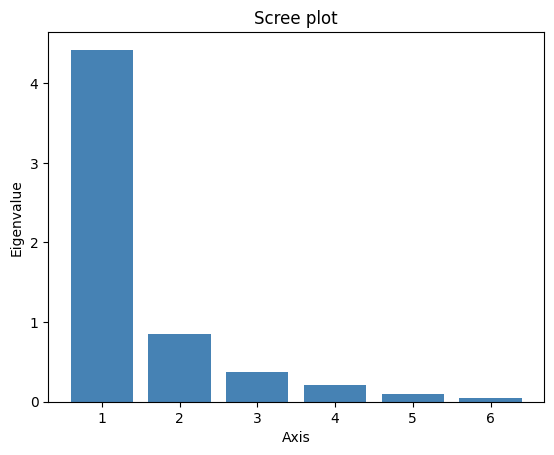

In [16]:
my_pca.plot_eigenvalues()

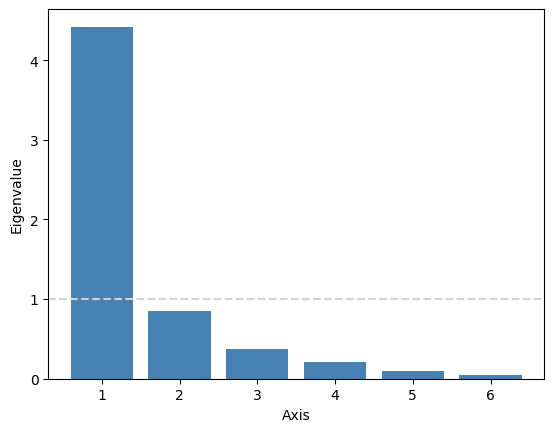

In [12]:
plt.bar(np.arange(1, my_pca.eig_[0].shape[0] + 1), my_pca.eig_[0], color="steelblue", align="center")
plt.xlabel("Axis")
plt.ylabel("Eigenvalue")
plt.axhline(y=1, color = "lightgrey", ls="--")

Text(73.68096766014816, 1, '73.68096766014816')

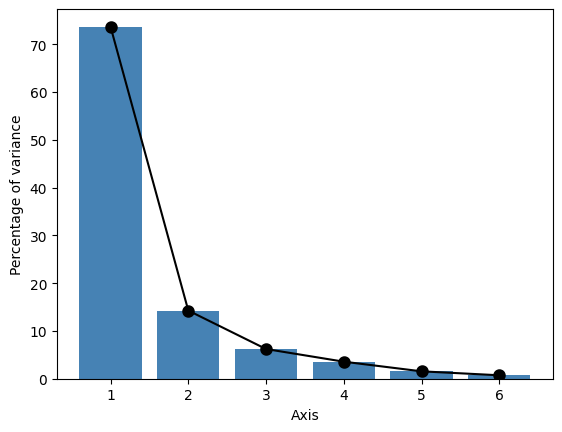

In [81]:
plt.bar(np.arange(1, my_pca.eig_[1].shape[0] + 1), my_pca.eig_[1], color="steelblue", align="center")
plt.xlabel("Axis")
plt.ylabel("Percentage of variance")
plt.scatter(np.arange(1, my_pca.eig_[1].shape[0] + 1), my_pca.eig_[1], color="black", linewidths=3)
plt.plot(np.arange(1, my_pca.eig_[1].shape[0] + 1), my_pca.eig_[1], color="black")

#for i in enumerate(np.arange(1, my_pca.eig_[1].shape[0] + 1)):
#plt.annotate(text = my_pca.eig_[1][0] , xy = (my_pca.eig_[1][0],np.arange(1, my_pca.eig_[1].shape[0] + 1)[0]))


In [8]:
print(my_pca.eig_)
print(my_pca.eigen_vectors_)

[[4.42085806e+00 8.56062289e-01 3.73066077e-01 2.13922089e-01
  9.28012120e-02 4.32902727e-02]
 [7.36809677e+01 1.42677048e+01 6.21776796e+00 3.56536815e+00
  1.54668687e+00 7.21504545e-01]
 [7.36809677e+01 8.79486725e+01 9.41664404e+01 9.77318086e+01
  9.92784955e+01 1.00000000e+02]]
[[ 0.42493602 -0.12419108  0.35361252 -0.80778648 -0.15158003  0.05889517]
 [ 0.42179441 -0.41577389  0.18492049  0.35779199  0.29373465  0.63303302]
 [ 0.42145993  0.41181773 -0.06763394  0.27975231 -0.73056903  0.19029153]
 [ 0.38692224  0.446087   -0.60486812 -0.21156941  0.47819008  0.10956624]
 [ 0.43051198  0.24267581  0.48439601  0.30171136  0.30455842 -0.5808122 ]
 [ 0.35894427 -0.6198626  -0.48547226  0.0735743  -0.18865511 -0.45852167]]
